In [1]:
import pickle as pkl
import pk_plot_library as pplib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import copy
from figrid.data_container import DataContainer

pplib.imports()
COSMO = '/Users/cosinga/overleaf/hi_cosmo/figures/'

In [2]:
ds = pkl.load(open('/Users/cosinga/code/hcolor/fig_md_analysis/12-29_pkdatasort.pkl', 'rb'))
print(ds.getAttrs())

ds.tickArgs(direction = 'in', right = True, top = True, labelsize = 14)
ds.legendArgs(frameon = False, loc = 'upper right', fontsize = 14, slc = (-1, -1))

ds.axisLabelArgs('both', fontsize = 16)
ds.rowLabelArgs(pos = [0.05, 0.05], fontsize = 16, ha = 'left', va = 'bottom')
ds.colLabelArgs(pos = [0.5, 0.95], fontsize = 16, ha = 'center' , va = 'top')
ds.axisArgs(xscale = 'log', yscale = 'log', xlim = [0.04, 10])

ds.setOrder('space', ['real', 'redshift', 'rsd'])

ds.displayAs('space', ['real', 'redshift', 'rsd'], ['Real Space', 'Redshift Space', 'Redshift Space\nDistortions'])
ds.displayAs('snapshot', [99, 67, 50], ['z = 0.0', 'z = 0.5', 'z = 1.0'])
ds.displayAs('color', ['blue', 'red', 'resolved'], 
             ['HI $\\times$ Blue', 'HI $\\times$ Red', 'HI $\\times$ All Gal.'])
ds.displayAs('HI_fieldname', ['hisubhalo', 'vn', 'hiptl'], ['Galaxy Centers', 'All Particles', 'Particles in Galaxies'])

ds.setColors('HI_fieldname', ['firebrick', 'saddlebrown', 'sandybrown'], ['vn', 'hiptl', 'hisubhalo'])
ds.setColors('color', ['red', 'blue', 'gray'], ['red', 'blue', 'resolved'])

ds.setXLabel(pplib.wnum())
print(ds.getAttrVals('post_process'))
print(ds.getAttrVals('fieldname'))

['path', 'result_type', 'result_runtime', 'is_auto', 'box', 'simname', 'sim_resolution', 'num_part', 'grid_resolution', 'snapshot', 'redshift', 'axis', 'fieldname', 'is_hydrogen', 'is_atomic', 'is_molecular', 'is_particle', 'is_groupcat', 'is_matter', 'mas', 'space', 'compute_xi', 'compute_slice', 'color', 'gal_species', 'gal_res', 'color_cut', 'ptl_species', 'map', 'model', 'HI_fieldname', 'projection', 'HI_res', 'censat', 'type', 'subtype', 'empty_cells', 'post_process', 'numerator', 'denominator']
['no key found', 'theory_bias', 'obs_bias', 'corr_coef']
['galaxy', 'hiptl_ptl', 'hiptl', 'vn_galaxy', 'hiptl_galaxy', 'galaxy_dust', 'vn_ptl', 'vn', 'ptl', 'hisubhalo_ptl', 'hisubhalo_galaxy', 'hisubhalo', 'galaxy_ptl', 'hisubhalo_galaxy_dust']


The row values for : ['no key found']
The column values for snapshot: [50]


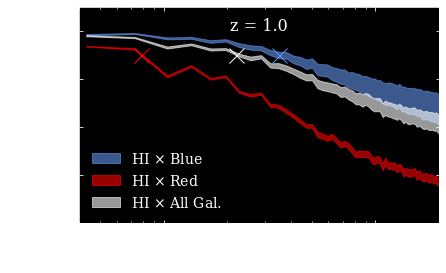

In [37]:
ip = {'is_auto':False, 'post_process':'corr_coef', 'HI_fieldname':['vn', 'hiptl'], 'space':['real'], 'gal_res':'diemer',
      'gal_species':'stmass', 'snapshot':[50], 'simname':'tng300',
      'censat':['no key found', 'both'], 'mas':'CICW', 'color': ['red', 'blue', 'resolved'],
     'path':'fiducial'}
gspec = {'xborder':[0.2, 0], 'yborder':[0, 0.2]}
fg = ds.figrid('color', '', 'snapshot', ip)
fg.gspecArgs(gspec)
fg.setPanelsize(5,3)
fg.plotArgs({'color':'blue'}, color = 'cornflowerblue')
fg.plotArgs({'color':'resolved'}, color = 'white')
fg.axisArgs(yscale = 'linear', ylim = (0.2, 1.1), xlim = (0.04, 2))
fg.autoFill()
fg.legendArgs(loc = 'lower left')
fg.setDefaultTicksParams()
fg.setYLabel(pplib.cclab('HI', 'Gal'))
pplib.darkmode(fg)
fg.plot()

for i in range(1):
    ax = fg.axes[0, i]
#     xlim = ax.get_xlim()
#     ax.axhline(0.9, xlim[0], xlim[1], linestyle = 'dashed', color = 'white')
    mkw = {'marker':'x', 'markersize':15}
    ax.plot(0.078, 0.9, color = 'red', **mkw)
    ax.plot(0.22, 0.9, color = 'white', **mkw)
    ax.plot(0.35, 0.9, color = 'cornflowerblue', **mkw)
fg.fig.set(facecolor = 'none')
fg.fig.savefig('cc_poster.png', dpi = 800, bbox_inches = 'tight')

In [6]:
ip = {'is_auto':False, 'post_process':'corr_coef', 'HI_fieldname':['vn'], 'space':['real'], 'gal_res':'diemer',
      'gal_species':'stmass', 'snapshot':[50], 'simname':'tng300',
      'censat':['no key found', 'both'], 'mas':'CICW', 'color': ['resolved'],
     'path':'fiducial'}
cc = ds.getMatching(ip)
print(len(cc))
data = cc[0].getData()
pkl.dump(data, open('../higal_cc_demo_50.pkl', 'wb'), pkl.HIGHEST_PROTOCOL)


1


The row values for space: ['real', 'redshift']
The column values for snapshot: [99, 67, 50]


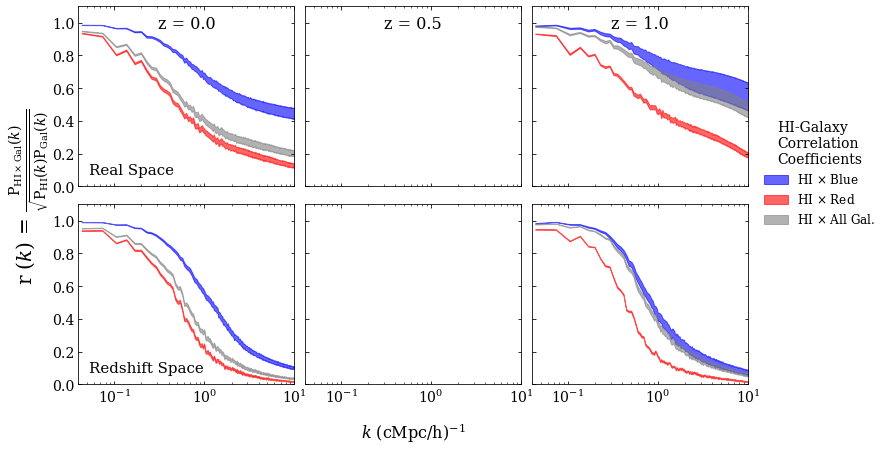

In [28]:
ip = {'is_auto':False, 'post_process':'corr_coef', 'HI_fieldname':['vn', 'hiptl'], 'space':['real', 'redshift'], 'gal_res':'diemer',
      'gal_species':'stmass', 'snapshot':[99, 67, 50], 'simname':'tng300',
      'censat':['no key found', 'both'], 'mas':'CICW', 'color': ['red', 'blue', 'resolved'],
     'path':'fiducial'}
gspec = {'xborder':[0.33, 0], 'hspace':0.1, 'wspace':0.05}

ccfg = ds.figrid("color", "space", 'snapshot', ip)
ccfg.autoFill(alpha = 0.6)
ccfg.setPanelsize(3, 2.5)
ccfg.gspecArgs(yborder = [0, 0.33], **gspec)
ccfg.setDefaultTicksParams()
ccfg.setYLabel(pplib.cclab("HI", "Gal"))
ccfg.legendArgs(slc = (0,2), loc = (1.05, -0.25), title = 'HI-Galaxy\nCorrelation\nCoefficients', fontsize = 12, title_fontsize = 14)
ccfg.rowLabelArgs(fontsize = 15)
ccfg.axisArgs(yscale = 'linear', ylim = (0, 1.1))
ccfg.plot()
ccfg.save(COSMO + 'cc_color_spaceR_snapC_placeholder.png')

The row values for space: ['real', 'redshift']
The column values for snapshot: [99, 67, 50]


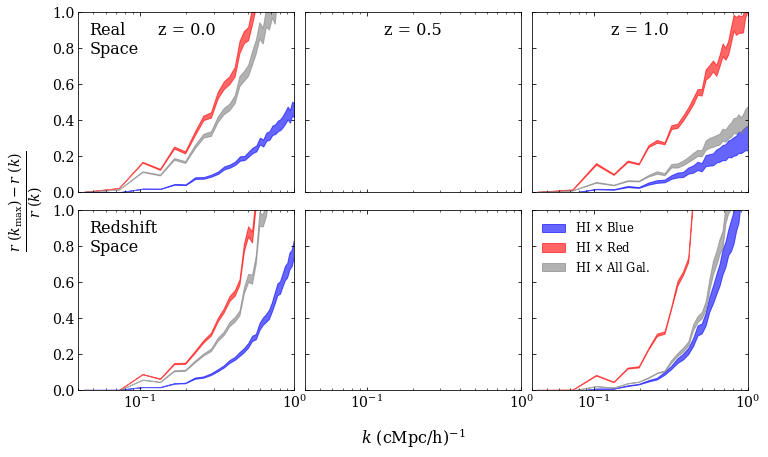

In [31]:
ccfg = ds.figrid("color", "space", 'snapshot', ip)

for i in range(ccfg.panels.shape[0]):
    for j in range(ccfg.panels.shape[1]):
        for dc in ccfg.panels[i, j]:
            data = dc.getData()
            x = data[0]; y = data[1]
            ylin = y[0]
            yerr = (ylin - y) / y
            dc.setData([x, yerr])
ccfg.autoFill(alpha = 0.6)
ccfg.setPanelsize(3, 2.5)
ccfg.gspecArgs(yborder = [0, 0.33], **gspec)
ccfg.setDefaultTicksParams()
ccfg.rowLabels(['Real\nSpace', 'Redshift\nSpace'], pos = (0.05, 0.95))
ccfg.rowLabelArgs(va = 'top')
ccfg.axisArgs(yscale = 'linear', ylim = (0, 1), xlim = (.04, 1))
ccfg.legendArgs(loc = 'upper left', fontsize = 11.5)
ccfg.setYLabel(r'$\frac{r \ (k_{\mathrm{max}}) - r \ (k)}{r \ (k)}$', fontsize = 20)
ccfg.plot()
ccfg.save(COSMO + 'ccerr_color_spaceR_snapC_placeholder.png')

## Comparing real and redshift space

The row values for color: ['red', 'blue', 'resolved']
The column values for snapshot: [99, 67, 50]


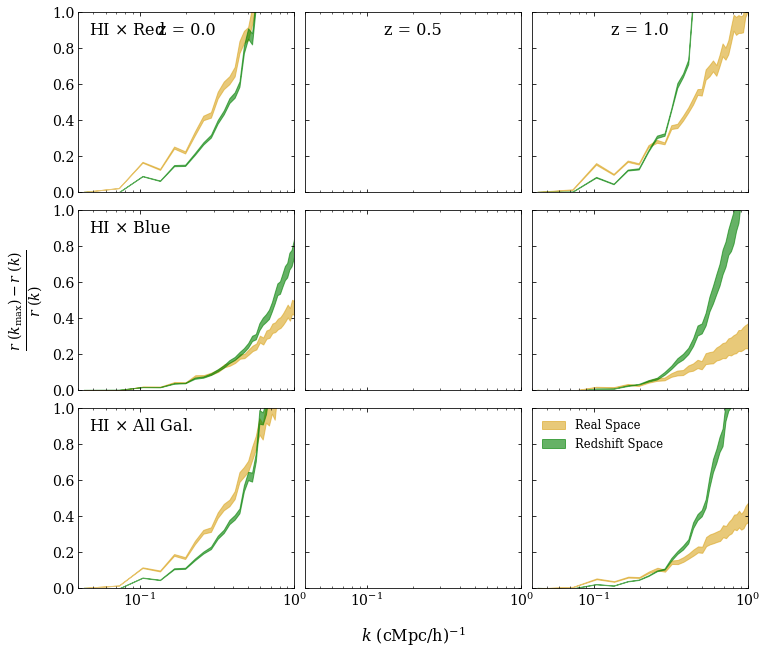

In [32]:

ccfg = ds.figrid("space", "color", 'snapshot', ip)

for i in range(ccfg.panels.shape[0]):
    for j in range(ccfg.panels.shape[1]):
        for dc in ccfg.panels[i, j]:
            data = dc.getData()
            x = data[0]; y = data[1]
            ylin = y[0]
            yerr = (ylin - y) / y
            dc.setData([x, yerr])
ccfg.autoFill(alpha = 0.6)
ccfg.setPanelsize(3, 2.5)
ccfg.plotArgs({'space':'real'}, color = 'goldenrod')
ccfg.plotArgs({'space':'redshift'}, color = 'green')

ccfg.gspecArgs(yborder = [0, 0.33], **gspec)
ccfg.setDefaultTicksParams()
ccfg.rowLabels(pos = (0.05, 0.95))
ccfg.rowLabelArgs(va = 'top')
ccfg.axisArgs(yscale = 'linear', ylim = (0, 1), xlim = (.04, 1))
ccfg.legendArgs(loc = 'upper left', fontsize = 11.5)
ccfg.setYLabel(r'$\frac{r \ (k_{\mathrm{max}}) - r \ (k)}{r \ (k)}$', fontsize = 20)
ccfg.plot()


The row values for color: ['red', 'blue', 'resolved']
The column values for space: ['real', 'redshift']


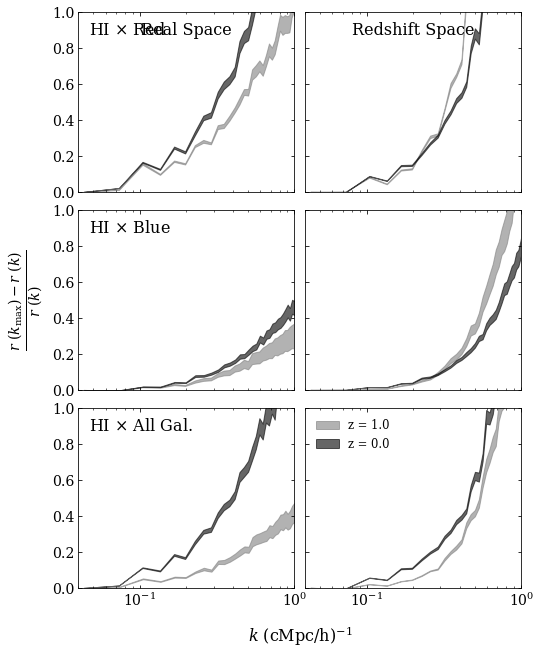

In [33]:

ccfg = ds.figrid("snapshot", "color", 'space', ip)

for i in range(ccfg.panels.shape[0]):
    for j in range(ccfg.panels.shape[1]):
        for dc in ccfg.panels[i, j]:
            data = dc.getData()
            x = data[0]; y = data[1]
            ylin = y[0]
            yerr = (ylin - y) / y
            dc.setData([x, yerr])
ccfg.autoFill(alpha = 0.6)
ccfg.setPanelsize(3, 2.5)
ccfg.plotArgs({'snapshot':99}, color = 'black')
ccfg.plotArgs({'snapshot':50}, color = 'gray')

ccfg.gspecArgs(yborder = [0, 0.33], **gspec)
ccfg.setDefaultTicksParams()
ccfg.rowLabels(pos = (0.05, 0.95))
ccfg.rowLabelArgs(va = 'top')
ccfg.axisArgs(yscale = 'linear', ylim = (0, 1), xlim = (.04, 1))
ccfg.legendArgs(loc = 'upper left', fontsize = 11.5)
ccfg.setYLabel(r'$\frac{r \ (k_{\mathrm{max}}) - r \ (k)}{r \ (k)}$', fontsize = 20)
ccfg.plot()


## Checking if how HI is represented matters

The row values for color: ['red', 'blue', 'resolved']
The column values for snapshot: [99, 67, 50]


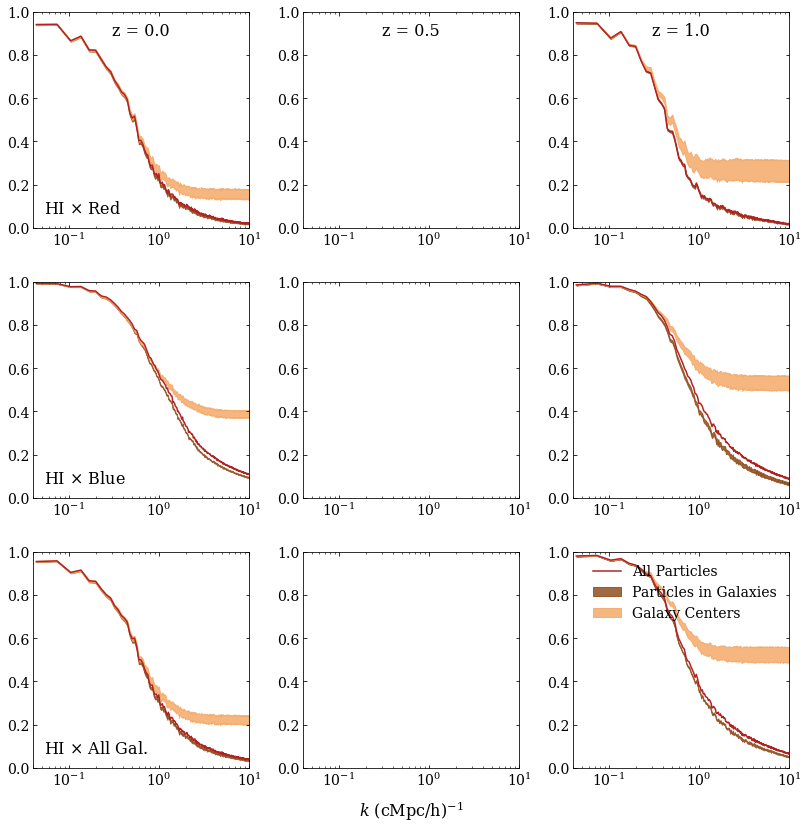

In [26]:
ip = {'is_auto':False, 'post_process':'corr_coef', 'HI_fieldname':['vn', 'hiptl', 'hisubhalo'], 'space':['redshift'], 'gal_res':'diemer',
      'gal_species':'stmass', 'snapshot':[99, 67, 50], 'simname':'tng300',
      'censat':['no key found', 'both'], 'mas':'CICW', 'color': ['red', 'blue', 'resolved'],
     'path':'fiducial'}
fg = ds.figrid('HI_fieldname', 'color', 'snapshot', ip)
fg.autoFill(alpha = 0.8)
fg.axisArgs(yscale = 'linear', ylim = (0, 1))
fg.plot()

## HI-Matter Correlation Coefficients

The row values for : ['no key found']
The column values for snapshot: [99, 67, 50]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


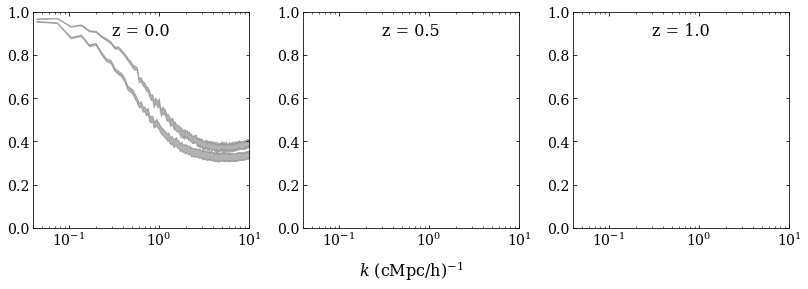

In [38]:
ip = {'is_auto':False, 'post_process':'corr_coef', 'HI_fieldname':['vn', 'hiptl'], 'space':['real', 'redshift'],
    'snapshot':[99, 67, 50], 'simname':'tng300', 'fieldname':['hiptl_ptl', 'vn_ptl'], 'ptl_species':['no key found', 'ptl'],
      'mas':'CICW',
     'path':'fiducial'}
fg = ds.figrid('space', '', 'snapshot', ip)
fg.autoFill(alpha = 0.6)
fg.axisArgs(yscale = 'linear', ylim = (0, 1))
fg.plot()

In [34]:
ds.getAttrVals('ptl_species')

['no key found', 'dm', 'gas', 'ptl', 'stmass']

In [37]:
ds.printMatching({'post_process':'corr_coef', 'simname':'tng300', 'snapshot':50, 'HI_fieldname':'vn'})

{'path': 'fiducial', 'result_type': 'pk', 'result_runtime': 27.282862186431885, 'is_auto': False, 'box': 205.0, 'simname': 'tng300', 'sim_resolution': 'high', 'num_part': 2740098112, 'grid_resolution': 800, 'snapshot': 50, 'redshift': 0.9972942257819404, 'axis': 0, 'fieldname': 'vn_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': 'True_False', 'is_groupcat': 'False_True', 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'real', 'compute_xi': True, 'compute_slice': False, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.50', 'censat': 'both', 'map': 'mass', 'HI_fieldname': 'vn', 'post_process': 'corr_coef'}

{'path': 'fiducial', 'result_type': 'pk', 'result_runtime': 28.081520557403564, 'is_auto': False, 'box': 205.0, 'simname': 'tng300', 'sim_resolution': 'high', 'num_part': 2740098112, 'grid_resolution': 800, 'snapshot': 50, 'redshift': 0.9972942257819404, 'axis': 0, 'fieldname': 'vn_galaxy', 'is_hyd